In [ ]:
Outline- Richer Output Spaces:
    Load the wine data
    Split data into training and testing data
    Implement One vs One on Logistic Regression. Understanding Boundaries.
    Implement One vs Rest on Logistic Regression. Understanding Boundaries.
    Move to the Practice Problem

In [24]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsOneClassifier, OneVsRestClassifier
from matplotlib.colors import ListedColormap
from sklearn.svm import LinearSVC
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [25]:
# Load the wine dataset
data = pd.read_csv('wine_original.csv')
labels = data['class']
del data['class']

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(data[['Alcohol', 'Malic acid']], labels, test_size=0.2, random_state=5)

In [26]:
clf = OneVsOneClassifier(LogisticRegression(C=10)).fit(X_train, y_train)
pred = clf.predict(X_test)

In [27]:
print ('Test accuracy = ' + str(accuracy_score(y_test, pred)))

Test accuracy = 0.75


In [28]:
def plot_map(clf, title, labels):
    h = .008  # step size in the mesh

    # Create color maps
    cmap_light = ListedColormap(np.array(['#FFAAAA', '#AAFFAA', '#AAAAFF', '#AAAAAA'])[labels])
    cmap_bold = ListedColormap(np.array(['#FF0000', '#00FF00', '#0000FF']))


    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X_train['Alcohol'].min() - 1, X_train['Alcohol'].max() + 1
    y_min, y_max = X_train['Malic acid'].min() - 1, X_train['Malic acid'].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                    np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X_train['Alcohol'], X_train['Malic acid'], c=y_train, cmap=cmap_bold)
    plt.scatter(X_test['Alcohol'], X_test['Malic acid'], c=y_test, marker='x', cmap=cmap_bold)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xlabel('Alcohol', fontsize=20)
    plt.ylabel('Malic acid', fontsize=20)
    plt.title(title, fontsize=20)


    plt.show()

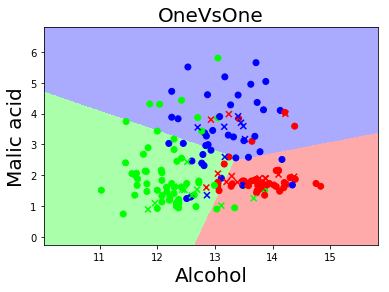

In [29]:
plot_map(clf, 'OneVsOne', [0,1,2])

In [30]:
clf.estimators_

(LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
           intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
           penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
           verbose=0, warm_start=False),
 LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
           intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
           penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
           verbose=0, warm_start=False),
 LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
           intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
           penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
           verbose=0, warm_start=False))

In [31]:
clf0 = clf.estimators_[0]
clf1 = clf.estimators_[1]
clf2 = clf.estimators_[2]

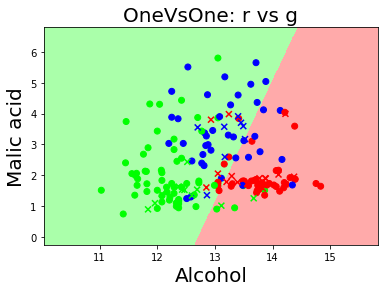

In [32]:
plot_map(clf0, 'OneVsOne: r vs g', [0,1])

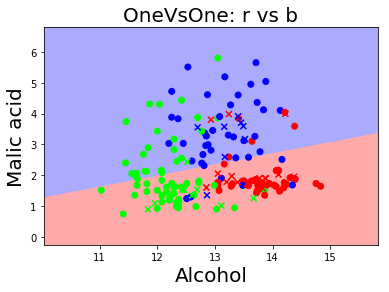

In [33]:
plot_map(clf1, 'OneVsOne: r vs b', [0,2])

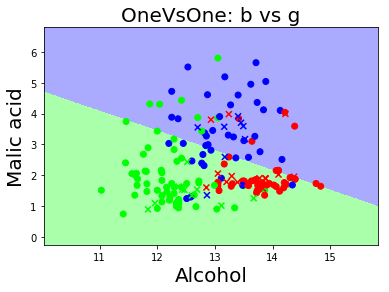

In [34]:
plot_map(clf2, 'OneVsOne: b vs g', [1,2])

In [38]:
clf = OneVsRestClassifier(LogisticRegression(C=10)).fit(X_train, y_train)
pred = clf.predict(X_test)

In [39]:
print ('Test accuracy = ' + str(accuracy_score(y_test, pred)))

Test accuracy = 0.75


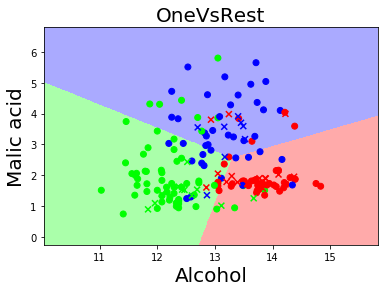

In [40]:
plot_map(clf, 'OneVsRest', [0,1,2])

In [41]:
clf0 = clf.estimators_[0]
clf1 = clf.estimators_[1]
clf2 = clf.estimators_[2]

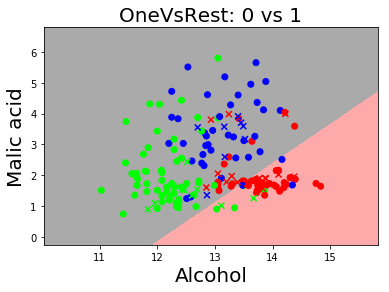

In [42]:
plot_map(clf0, 'OneVsRest: 0 vs 1', [3,0])

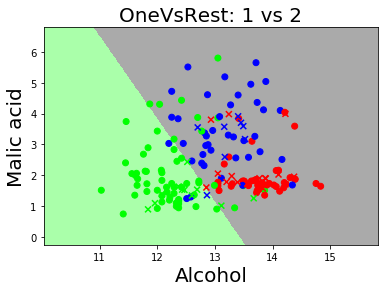

In [43]:
plot_map(clf1, 'OneVsRest: 1 vs 2', [3,1])

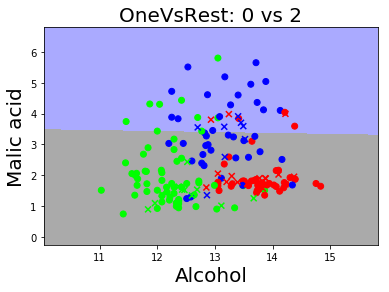

In [44]:
plot_map(clf2, 'OneVsRest: 0 vs 2', [3,2])

In [185]:
# Why does the blue boundary looks odd?

In [ ]:
# How many classifiers in each case?

In [ ]:
# What method do the decision trees follow?

# Practice Question
1. Load the Iris dataset. Take the first 2 features.
2. Perform OnevsOne and OnevsRest classification using the SVM.
3. Plot the descision boundaries. Compare the decision boundaries with Logistic Regression.